In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [19]:
df = pd.read_csv('Ground_Truth.csv')

In [20]:
df

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP
3,00000248_008.png,Atelectasis,248,87,M,AP
4,00000248_009.png,Atelectasis,248,87,M,AP
...,...,...,...,...,...,...
111005,00030801_001.png,Mass|Pneumonia,30801,38,M,PA
111006,00030802_000.png,No Finding,30802,28,M,PA
111007,00030803_000.png,No Finding,30803,42,F,PA
111008,00030804_000.png,No Finding,30804,29,F,PA


In [21]:
df.head()

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP
3,00000248_008.png,Atelectasis,248,87,M,AP
4,00000248_009.png,Atelectasis,248,87,M,AP


In [22]:
df.tail()

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
111005,00030801_001.png,Mass|Pneumonia,30801,38,M,PA
111006,00030802_000.png,No Finding,30802,28,M,PA
111007,00030803_000.png,No Finding,30803,42,F,PA
111008,00030804_000.png,No Finding,30804,29,F,PA
111009,00030805_000.png,No Finding,30805,26,M,PA


In [23]:
df.size

666060

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111010 entries, 0 to 111009
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Image Index     111010 non-null  object
 1   Finding Labels  111010 non-null  object
 2   Patient ID      111010 non-null  int64 
 3   Patient Age     111010 non-null  int64 
 4   Patient Gender  111010 non-null  object
 5   View Position   111010 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.1+ MB


In [25]:
df.describe()

,Patient ID,Patient Age
count,111010.000000,111010.000000
mean,14476.875336,46.475254
std,8330.843286,16.570118
min,248.000000,0.000000
25%,7523.000000,34.000000
50%,14078.000000,48.000000
75%,20726.000000,59.000000
max,30805.000000,95.000000


In [26]:
df.columns

Index(['Image Index', 'Finding Labels', 'Patient ID', 'Patient Age',
       'Patient Gender', 'View Position'],
      dtype='object')

In [27]:
df.isnull().sum()

Image Index       0
Finding Labels    0
Patient ID        0
Patient Age       0
Patient Gender    0
View Position     0
dtype: int64

In [28]:

unique_patients = df.drop_duplicates(subset=["Patient ID", "Patient Age", "Patient Gender"])

In [29]:
unique_patients

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
23,00000249_000.png,No Finding,249,40,M,PA
24,00000250_000.png,No Finding,250,49,M,PA
36,00000250_012.png,No Finding,250,50,M,AP
38,00000250_014.png,Infiltration|Mass,250,52,M,PA
...,...,...,...,...,...,...
111004,00030801_000.png,No Finding,30801,38,M,PA
111006,00030802_000.png,No Finding,30802,28,M,PA
111007,00030803_000.png,No Finding,30803,42,F,PA
111008,00030804_000.png,No Finding,30804,29,F,PA


In [30]:

age_stats_by_gender = unique_patients.groupby('Patient Gender')['Patient Age'].agg(['max', 'min', 'mean']).reset_index()

In [31]:
age_stats_by_gender

,Patient Gender,max,min,mean
0,F,95,0,45.563368
1,M,93,0,46.390648


In [32]:

age_gender_counts = unique_patients.groupby(['Patient Age', 'Patient Gender']).size().unstack(fill_value = 0)

In [33]:
age_gender_counts

Patient Gender,F,M
Patient Age,,
0,4,10
1,18,25
2,23,25
3,32,37
4,36,51
...,...,...
90,3,2
91,1,4
92,1,2


Number of Males and Females for Each Age¶


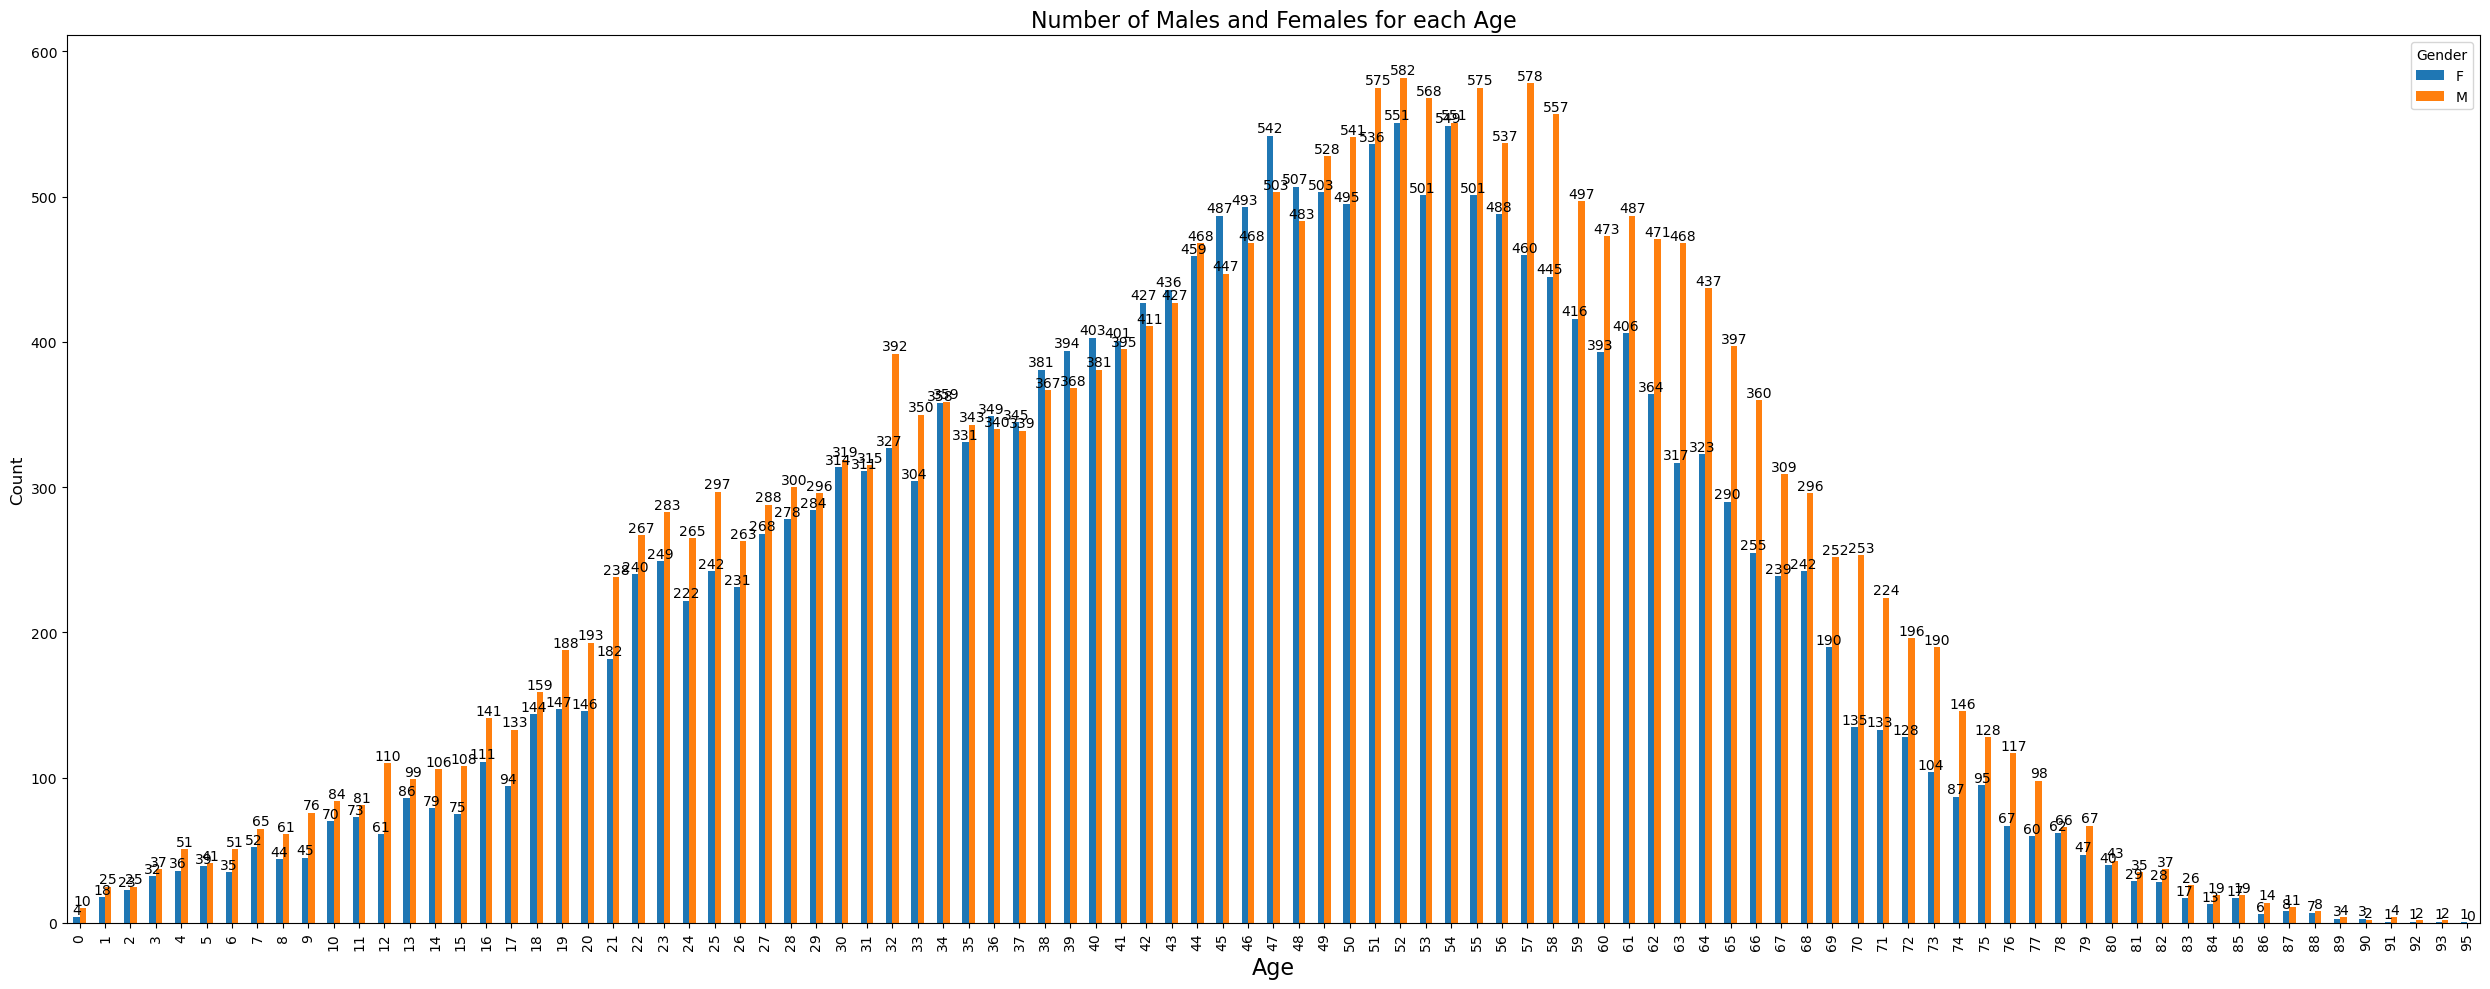

In [34]:

ax = age_gender_counts.plot(kind='bar', figsize=(25,10), stacked=False)
plt.title("Number of Males and Females for each Age", fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.2, str(round(height)), ha='center', va='bottom', fontsize=10, color="black")
plt.tight_layout()
plt.show()

In [35]:

most_patient_age_by_gender = unique_patients.groupby(['Patient Gender', 'Patient Age']).size().reset_index(name='Count')
most_common_age_by_gender = most_patient_age_by_gender.loc[most_patient_age_by_gender.groupby('Patient Gender')['Count'].idxmax()]
most_common_age_by_gender

,Patient Gender,Patient Age,Count
52,F,52,551
147,M,52,582


Most female patients who come for chest condition X-rays are aged 52, while the majority of male patients are aged 52

Position used to capture the xray For Each Age

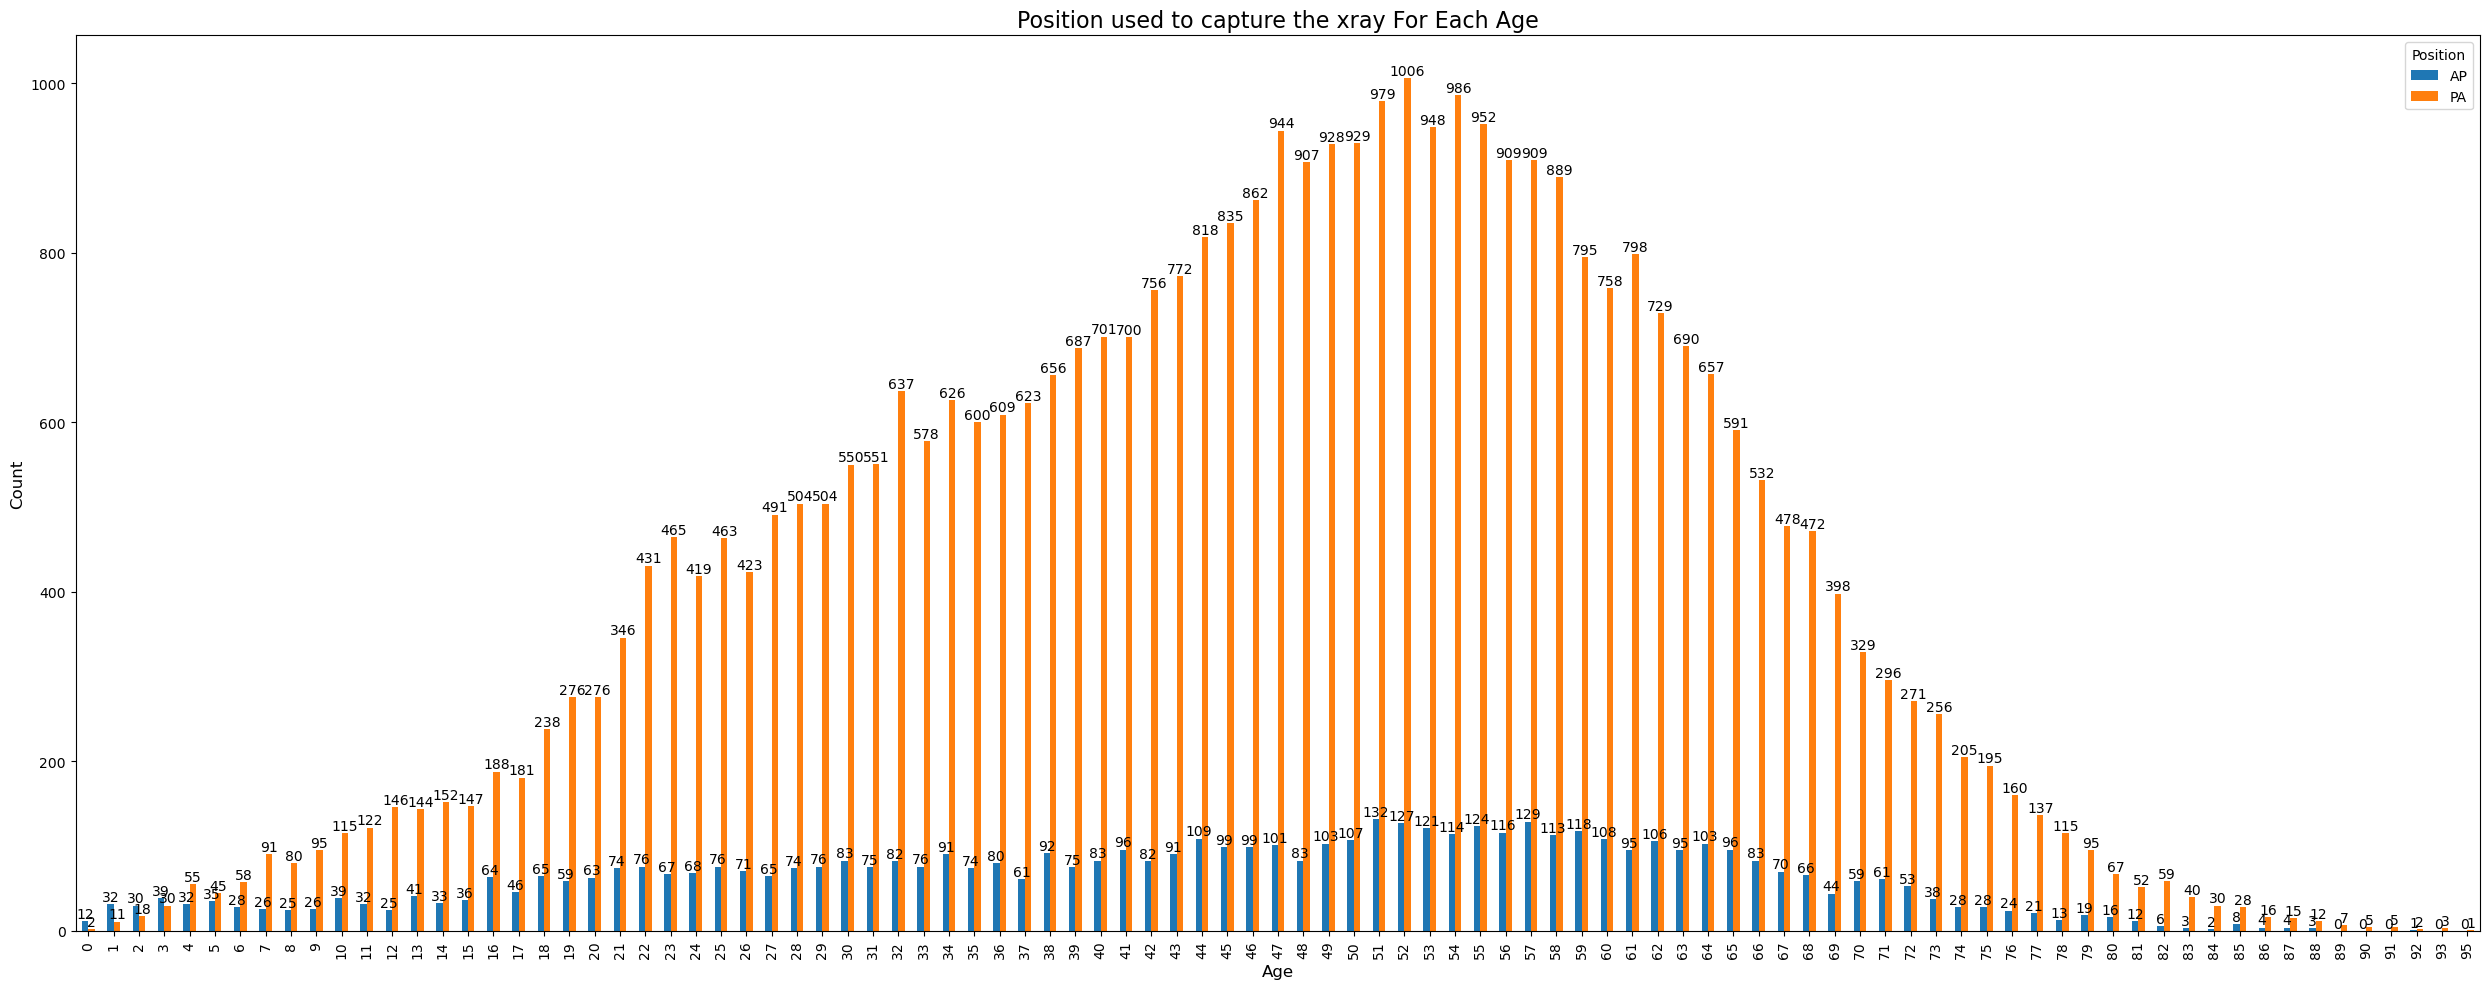

In [36]:
age_viewPosition_counts = unique_patients.groupby(['Patient Age', 'View Position']).size().unstack(fill_value=0)

ay = age_viewPosition_counts.plot(kind='bar', figsize=(25, 10), stacked=False)

plt.title('Position used to capture the xray For Each Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Position')
for p in ay.patches:
    height = p.get_height()
    ay.text(p.get_x() + p.get_width() / 2, height + 0.2, str(round(height)), 
            ha='center', va='bottom', fontsize=10, color='black')


plt.tight_layout()
plt.show()

In [37]:
most_viewPlace_by_age = unique_patients.groupby(['Patient Age', 'View Position']).size().reset_index(name='Count')
most_common_viewplace_by_age = most_viewPlace_by_age.loc[most_viewPlace_by_age.groupby('View Position')['Count'].idxmax()]
most_common_viewplace_by_age

,Patient Age,View Position,Count
102,51,AP,132
105,52,PA,1006


For patients aged 51 & 52, the majority of them had their chest X-ray performed with the PA (Posteroanterior) view (688 patients), which is more common for chest X-rays. A smaller number of patients (132) had the AP (Anteroposterior) view.

In [38]:

filtered_df = unique_patients[unique_patients['Patient Age'] == 52]
gender_counts = filtered_df['Patient Gender'].value_counts()
gender_counts

Patient Gender
M    582
F    551
Name: count, dtype: int64

Patient Condtions Breakdown¶

In [39]:

all_type_of_findings = df["Finding Labels"].str.split("|").explode()
all_type_of_findings

0          Atelectasis
0             Effusion
0                 Mass
1          Atelectasis
1         Infiltration
              ...     
111005       Pneumonia
111006      No Finding
111007      No Finding
111008      No Finding
111009      No Finding
Name: Finding Labels, Length: 140077, dtype: object

In [40]:

conditions_count = all_type_of_findings.value_counts()
conditions_count

Finding Labels
No Finding            59932
Infiltration          19707
Effusion              13127
Atelectasis           11456
Nodule                 6290
Mass                   5741
Pneumothorax           5254
Consolidation          4619
Pleural_Thickening     3347
Cardiomegaly           2679
Emphysema              2474
Edema                  2270
Fibrosis               1647
Pneumonia              1418
Hernia                  116
Name: count, dtype: int64

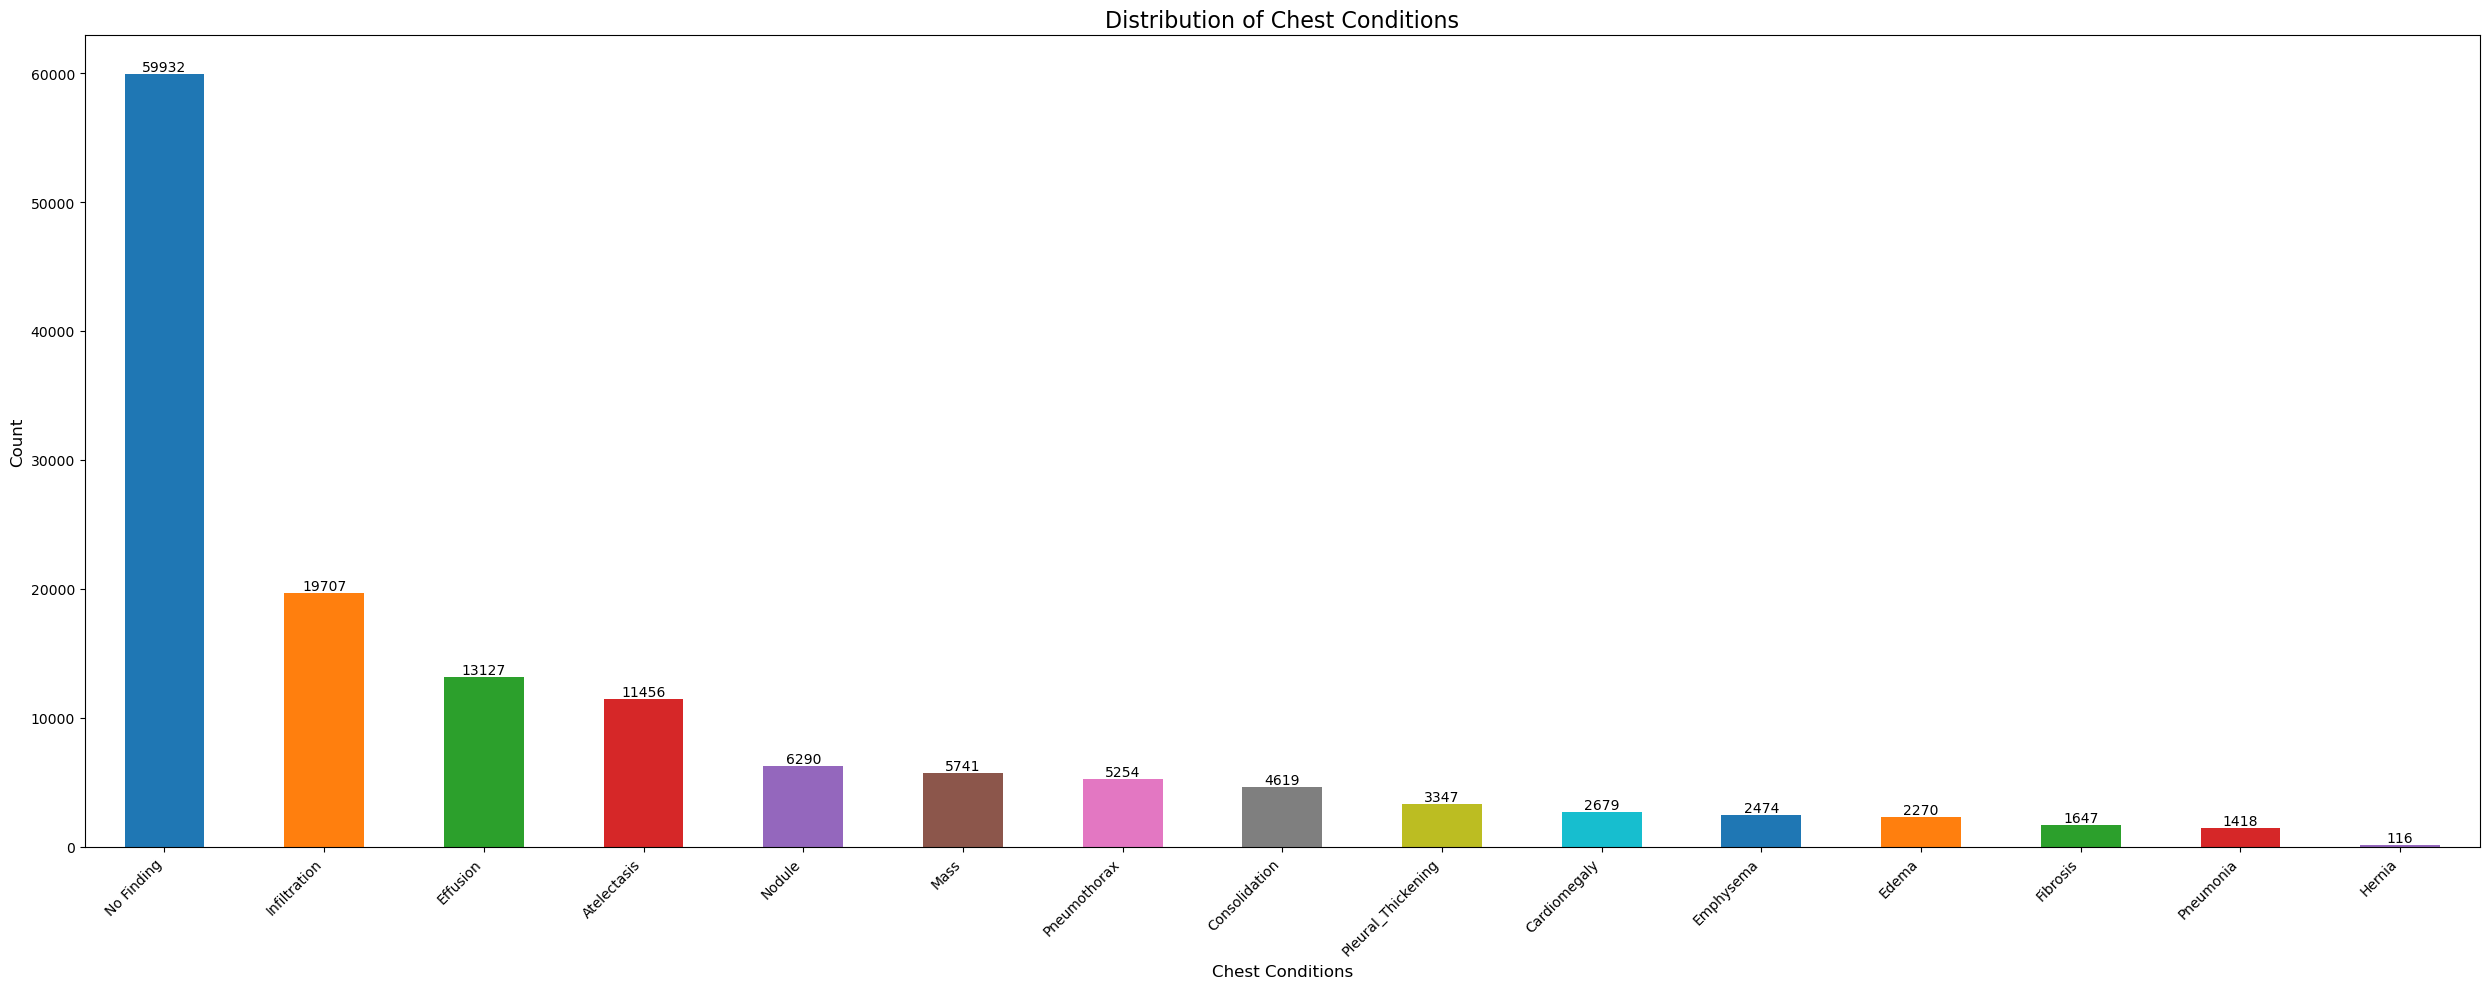

In [41]:

plt.figure(figsize=(25,10))
az = conditions_count.plot(kind='bar', color=plt.cm.tab10.colors)
plt.xlabel('Chest Conditions', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Chest Conditions', fontsize=16)
plt.xticks(rotation=45, ha='right')
for p in az.patches:
    height = p.get_height()
    az.text(
        p.get_x() + p.get_width() / 2, 
        height + 0.2, 
        str(int(height)),
        ha='center', va='bottom', fontsize=10, color='black'
    )
    
plt.tight_layout()
plt.show()

Patients condtions with Gender and Age



In [42]:
filtered_findings = all_type_of_findings[all_type_of_findings != "No Finding"]

In [43]:

result_df = df.loc[df.index.repeat(df["Finding Labels"].str.count("\|") + 1)]

<>:1: SyntaxWarning: invalid escape sequence '\|'
<>:1: SyntaxWarning: invalid escape sequence '\|'
C:\Users\vkr20\AppData\Local\Temp\ipykernel_19312\56683156.py:1: SyntaxWarning: invalid escape sequence '\|'
  result_df = df.loc[df.index.repeat(df["Finding Labels"].str.count("\|") + 1)]


In [44]:
result_df.head()

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP


In [45]:

result_df["Finding Labels"] = filtered_findings.reset_index(drop=True)
result_df = result_df.dropna(subset=["Finding Labels"])
final_table = result_df[["Finding Labels", "Patient Age", "Patient Gender"]]

In [46]:
final_table

,Finding Labels,Patient Age,Patient Gender
0,Atelectasis,87,M
0,Atelectasis,87,M
0,Atelectasis,87,M
1,Effusion,87,M
1,Effusion,87,M
...,...,...,...
80140,Mass,57,M
80141,Nodule,57,M
80142,Pleural_Thickening,57,M
80143,Mass,57,M


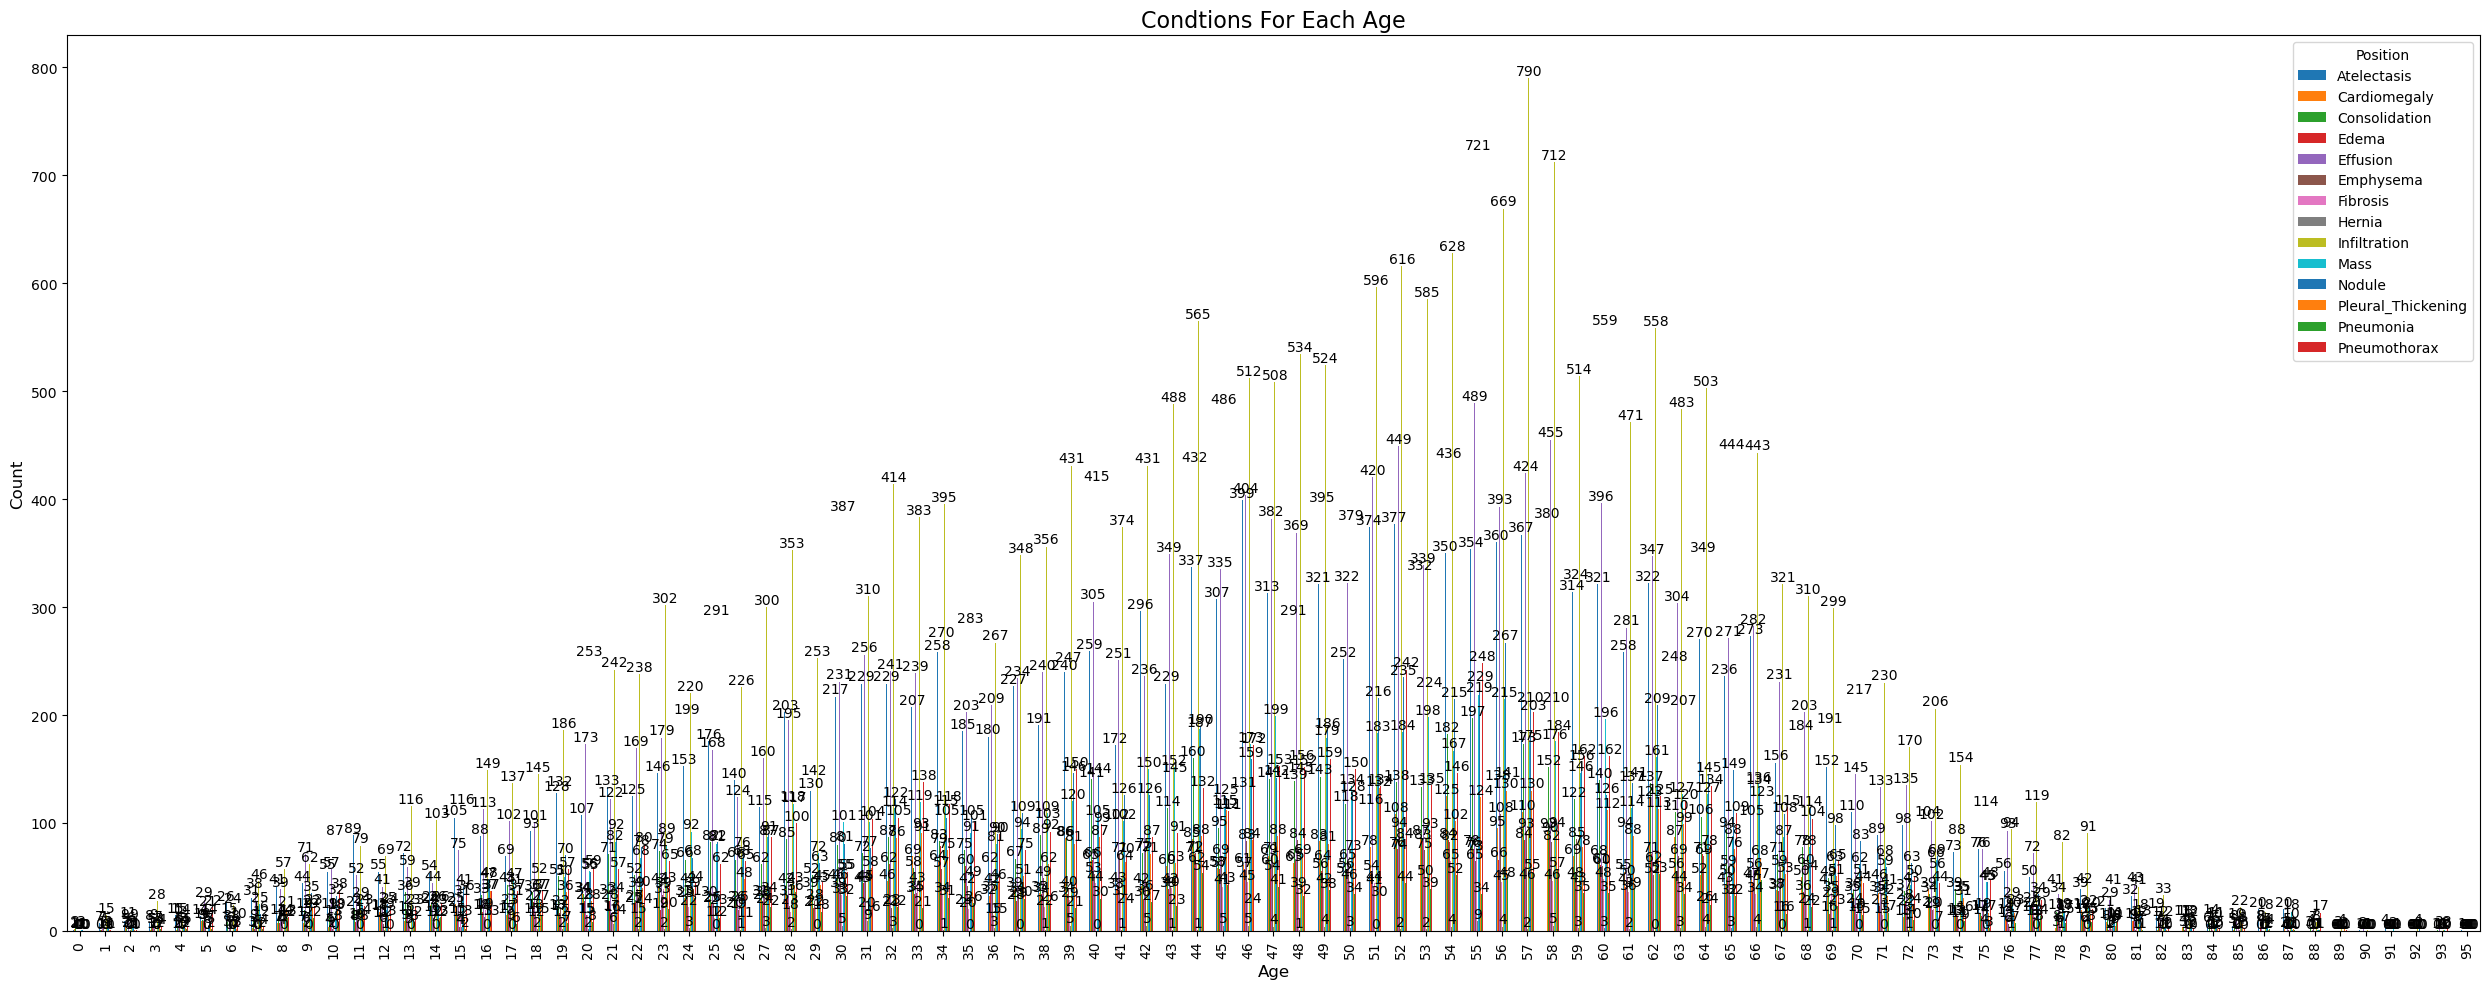

In [47]:

age_condtions_counts = final_table.groupby(['Patient Age', 'Finding Labels']).size().unstack(fill_value=0)

ay = age_condtions_counts.plot(kind='bar', figsize=(25, 10), stacked=False)

plt.title('Condtions For Each Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Position')

for p in ay.patches:
    height = p.get_height()
    ay.text(p.get_x() + p.get_width() / 2, height + 0.2, str(round(height)), 
            ha='center', va='bottom', fontsize=10, color='black')


plt.tight_layout()
plt.show()

In [48]:

grouped = result_df.groupby(["Patient Gender", "Patient Age", "Finding Labels"]).size().reset_index(name="Count")
grouped.head()

,Patient Gender,Patient Age,Finding Labels,Count
0,F,0,Cardiomegaly,1
1,F,0,Consolidation,1
2,F,1,Atelectasis,2
3,F,1,Consolidation,1
4,F,1,Effusion,4


In [49]:

pivot_table = grouped.pivot_table(
    index="Finding Labels", 
    columns=["Patient Age", "Patient Gender"], 
    values="Count", 
    fill_value=0
)

pivot_table.columns = [f"{age} ({gender})" for age, gender in pivot_table.columns]

In [50]:
final_condtions_table = pivot_table.reset_index()
final_condtions_table

,Finding Labels,0 (F),0 (M),1 (F),1 (M),2 (F),2 (M),3 (F),3 (M),4 (F),...,88 (M),89 (F),89 (M),90 (F),90 (M),91 (M),92 (M),93 (F),93 (M),95 (F)
0,Atelectasis,0.0,1.0,2.0,5.0,6.0,3.0,3.0,5.0,3.0,...,3.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,1.0
1,Cardiomegaly,1.0,1.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Consolidation,1.0,2.0,1.0,0.0,1.0,1.0,1.0,4.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Edema,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Effusion,0.0,0.0,4.0,3.0,6.0,5.0,2.0,7.0,9.0,...,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0
5,Emphysema,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,4.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Fibrosis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Hernia,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Infiltration,0.0,3.0,5.0,10.0,4.0,2.0,16.0,12.0,4.0,...,5.0,3.0,1.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0
9,Mass,0.0,1.0,1.0,4.0,2.0,1.0,5.0,2.0,3.0,...,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0


In [51]:

grouped_by_Condtions = grouped.groupby(["Finding Labels", "Patient Age"])["Count"].sum().reset_index()

In [52]:

most_patients_per_condition = grouped_by_Condtions.loc[grouped_by_Condtions.groupby("Finding Labels")["Count"].idxmax()]
most_patients_per_condition

,Finding Labels,Patient Age,Count
46,Atelectasis,46,399
146,Cardiomegaly,54,125
233,Consolidation,55,197
322,Edema,58,90
403,Effusion,55,489
495,Emphysema,56,108
571,Fibrosis,52,74
618,Hernia,31,9
712,Infiltration,57,790
803,Mass,55,219


Sort by 'Count' in ascending order



In [53]:

sorted_most_patients_by_count = most_patients_per_condition.sort_values(by="Count", ascending=True)
sorted_most_patients_by_count

,Finding Labels,Patient Age,Count
618,Hernia,31,9
1074,Pneumonia,58,57
571,Fibrosis,52,74
322,Edema,58,90
495,Emphysema,56,108
146,Cardiomegaly,54,125
980,Pleural_Thickening,51,132
233,Consolidation,55,197
803,Mass,55,219
1155,Pneumothorax,55,248


The highest patient count comes from the 57 age group, with 790 patients diagnosed with Infiltration.

Sort by 'Patient Age' in ascending order

In [54]:

sorted_most_patients_by_age = most_patients_per_condition.sort_values(by="Patient Age", ascending=True)
sorted_most_patients_by_age

,Finding Labels,Patient Age,Count
618,Hernia,31,9
46,Atelectasis,46,399
980,Pleural_Thickening,51,132
571,Fibrosis,52,74
146,Cardiomegaly,54,125
233,Consolidation,55,197
403,Effusion,55,489
803,Mass,55,219
1155,Pneumothorax,55,248
495,Emphysema,56,108


Most patients in the `55` age bracket are diagnosed with conditions such as Consolidation, Effusion, Mass, and Pneumothorax

Condtion breakdown for age 55

In [55]:
df_age_55 = grouped[grouped["Patient Age"]==55]


In [56]:

grouped_55 = df_age_55.groupby(["Finding Labels", "Patient Gender"])["Count"].sum().reset_index()
pivot_table_55 = grouped_55.pivot_table(
    index="Finding Labels", 
    columns="Patient Gender", 
    values="Count", 
    fill_value=0
)
pivot_table_55.columns = ["F", "M"]
pivot_table_55["Total"] = pivot_table_55["F"] + pivot_table_55["M"]
pivot_table_55

,F,M,Total
Finding Labels,,,
Atelectasis,174.0,180.0,354.0
Cardiomegaly,42.0,36.0,78.0
Consolidation,79.0,118.0,197.0
Edema,26.0,50.0,76.0
Effusion,185.0,304.0,489.0
Emphysema,28.0,37.0,65.0
Fibrosis,34.0,39.0,73.0
Hernia,3.0,6.0,9.0
Infiltration,286.0,435.0,721.0


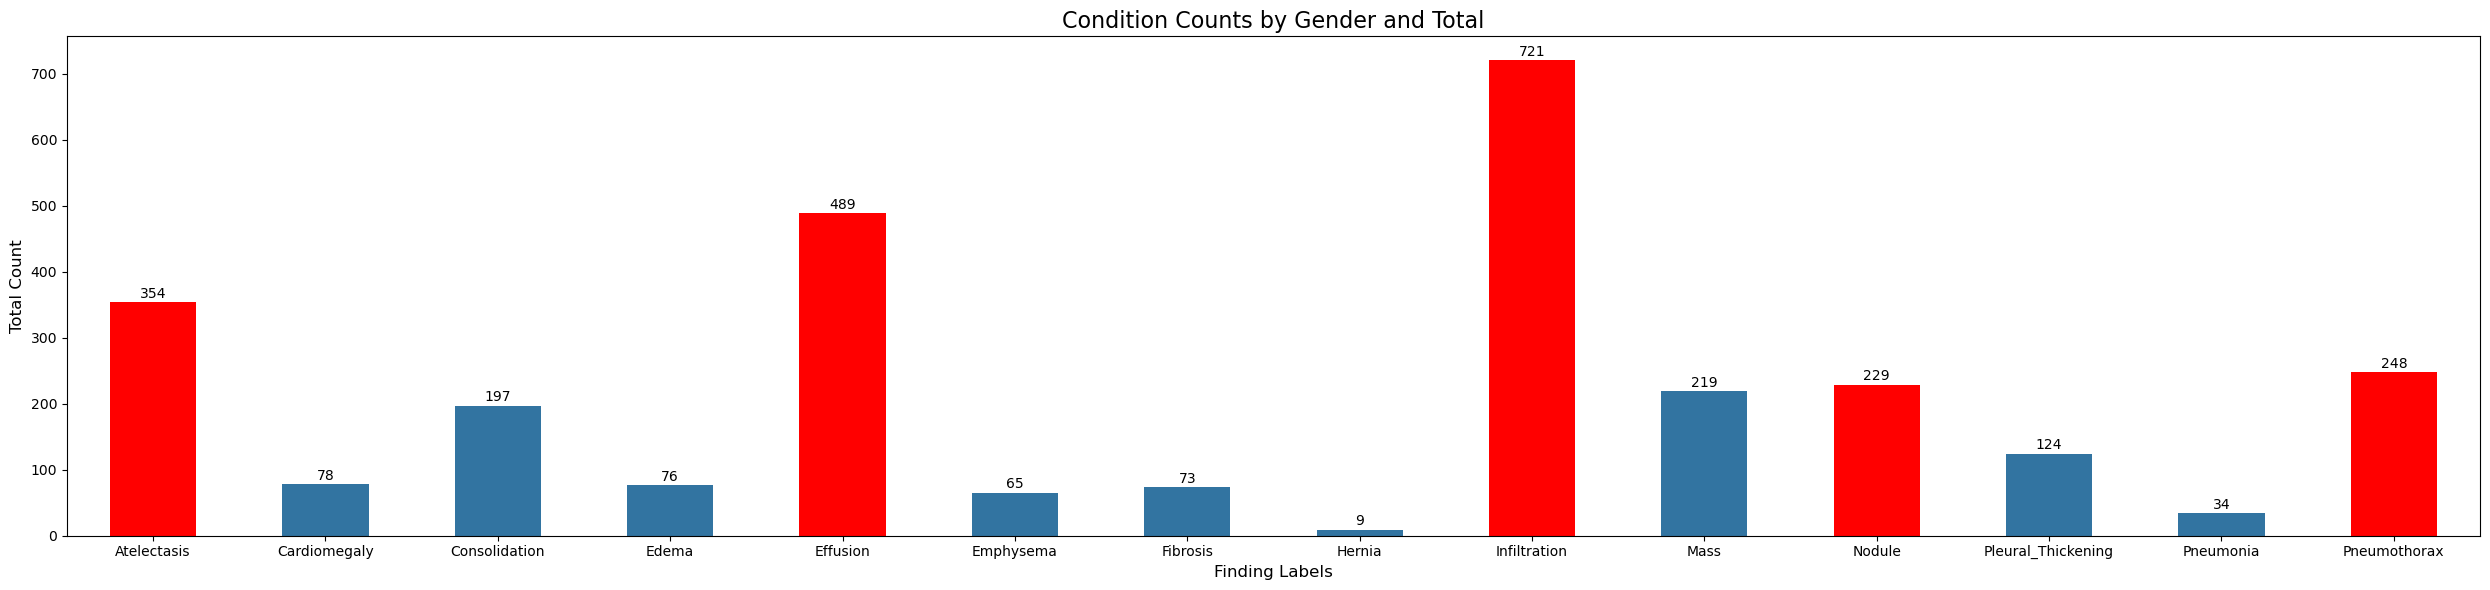

In [57]:
df_age_55 = grouped[grouped["Patient Age"]==55]

grouped_55 = df_age_55.groupby(["Finding Labels", "Patient Gender"])["Count"].sum().reset_index()
pivot_table_55 = grouped_55.pivot_table(
    index="Finding Labels", 
    columns="Patient Gender", 
    values="Count", 
    fill_value=0
)
pivot_table_55.columns = ["F", "M"]
pivot_table_55["Total"] = pivot_table_55["F"] + pivot_table_55["M"]
pivot_table_55
top_5_totals = pivot_table_55.nlargest(5, 'Total')
plt.figure(figsize=(25, 6))
bars = sb.barplot(data=pivot_table_55, x=pivot_table_55.index, y="Total", width=0.5)

for i, bar in enumerate(bars.patches):
    if pivot_table_55["Total"].iloc[i] in top_5_totals["Total"].values:
        bar.set_facecolor('red')

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}', ha="center", va="bottom", fontsize=10)

plt.title('Condition Counts by Gender and Total', fontsize=16)
plt.xlabel('Finding Labels', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [62]:
most_common_age_by_gender.to_csv("most_common_age_by_gender.csv", index=False)

In [63]:
most_common_age_by_gender

,Patient Gender,Patient Age,Count
52,F,52,551
147,M,52,582


In [64]:
most_common_viewplace_by_age.to_csv("most_common_viewplace_by_age.csv", index=False)


In [65]:
most_common_viewplace_by_age

,Patient Age,View Position,Count
102,51,AP,132
105,52,PA,1006


In [66]:
gender_counts.to_csv("gender_counts_age_52.csv")

In [67]:
gender_counts

Patient Gender
M    582
F    551
Name: count, dtype: int64

In [60]:
final_condtions_table.to_csv("final_conditions_table.csv", index=False)

In [61]:
final_condtions_table

,Finding Labels,0 (F),0 (M),1 (F),1 (M),2 (F),2 (M),3 (F),3 (M),4 (F),...,88 (M),89 (F),89 (M),90 (F),90 (M),91 (M),92 (M),93 (F),93 (M),95 (F)
0,Atelectasis,0.0,1.0,2.0,5.0,6.0,3.0,3.0,5.0,3.0,...,3.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,1.0
1,Cardiomegaly,1.0,1.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Consolidation,1.0,2.0,1.0,0.0,1.0,1.0,1.0,4.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Edema,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Effusion,0.0,0.0,4.0,3.0,6.0,5.0,2.0,7.0,9.0,...,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0
5,Emphysema,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,4.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Fibrosis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Hernia,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Infiltration,0.0,3.0,5.0,10.0,4.0,2.0,16.0,12.0,4.0,...,5.0,3.0,1.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0
9,Mass,0.0,1.0,1.0,4.0,2.0,1.0,5.0,2.0,3.0,...,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0


In [69]:
conditions_count.to_csv("conditions_count.csv")
conditions_count

Finding Labels
No Finding            59932
Infiltration          19707
Effusion              13127
Atelectasis           11456
Nodule                 6290
Mass                   5741
Pneumothorax           5254
Consolidation          4619
Pleural_Thickening     3347
Cardiomegaly           2679
Emphysema              2474
Edema                  2270
Fibrosis               1647
Pneumonia              1418
Hernia                  116
Name: count, dtype: int64

In [70]:
final_table.to_csv("final_table.csv", index=False)
final_table

,Finding Labels,Patient Age,Patient Gender
0,Atelectasis,87,M
0,Atelectasis,87,M
0,Atelectasis,87,M
1,Effusion,87,M
1,Effusion,87,M
...,...,...,...
80140,Mass,57,M
80141,Nodule,57,M
80142,Pleural_Thickening,57,M
80143,Mass,57,M


In [71]:
age_condtions_counts.to_csv("age_conditions_counts.csv")
age_condtions_counts

Finding Labels,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Patient Age,,,,,,,,,,,,,,
0,1,2,3,0,0,0,0,0,3,1,1,0,0,0
1,7,0,1,1,7,3,0,0,15,5,3,1,0,1
2,9,5,2,0,11,2,0,1,6,3,9,1,0,1
3,8,1,5,5,9,2,0,0,28,7,5,4,2,4
4,15,1,4,2,15,6,1,0,14,5,4,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1,0,0,0,2,0,0,0,1,1,0,0,0,0
91,4,0,0,0,0,0,0,0,0,2,0,0,0,1
92,0,0,0,0,0,0,0,0,4,0,2,0,0,0


In [73]:
pivot_table.to_csv("conditions_pivot_table.csv")
pivot_table

,0 (F),0 (M),1 (F),1 (M),2 (F),2 (M),3 (F),3 (M),4 (F),4 (M),...,88 (M),89 (F),89 (M),90 (F),90 (M),91 (M),92 (M),93 (F),93 (M),95 (F)
Finding Labels,,,,,,,,,,,,,,,,,,,,,
Atelectasis,0.0,1.0,2.0,5.0,6.0,3.0,3.0,5.0,3.0,12.0,...,3.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,1.0
Cardiomegaly,1.0,1.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Consolidation,1.0,2.0,1.0,0.0,1.0,1.0,1.0,4.0,1.0,3.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Edema,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Effusion,0.0,0.0,4.0,3.0,6.0,5.0,2.0,7.0,9.0,6.0,...,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0
Emphysema,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,4.0,2.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fibrosis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hernia,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Infiltration,0.0,3.0,5.0,10.0,4.0,2.0,16.0,12.0,4.0,10.0,...,5.0,3.0,1.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0


In [78]:
sorted_most_patients_by_count.to_csv("sorted_by_count.csv", index=False)
sorted_most_patients_by_count

,Finding Labels,Patient Age,Count
712,Infiltration,57,790
403,Effusion,55,489
46,Atelectasis,46,399
896,Nodule,56,267
1155,Pneumothorax,55,248
803,Mass,55,219
233,Consolidation,55,197
980,Pleural_Thickening,51,132
146,Cardiomegaly,54,125
495,Emphysema,56,108


In [74]:
most_patients_per_condition.to_csv("most_patients_per_condition.csv", index=False)
most_patients_per_condition

,Finding Labels,Patient Age,Count
46,Atelectasis,46,399
146,Cardiomegaly,54,125
233,Consolidation,55,197
322,Edema,58,90
403,Effusion,55,489
495,Emphysema,56,108
571,Fibrosis,52,74
618,Hernia,31,9
712,Infiltration,57,790
803,Mass,55,219


In [75]:
sorted_most_patients_by_age.to_csv("sorted_by_age.csv", index=False)
sorted_most_patients_by_age

,Finding Labels,Patient Age,Count
618,Hernia,31,9
46,Atelectasis,46,399
980,Pleural_Thickening,51,132
571,Fibrosis,52,74
146,Cardiomegaly,54,125
233,Consolidation,55,197
403,Effusion,55,489
803,Mass,55,219
1155,Pneumothorax,55,248
495,Emphysema,56,108


In [76]:
top_5_totals.to_csv("top_5_conditions_at_55.csv")
top_5_totals

,F,M,Total
Finding Labels,,,
Infiltration,286.0,435.0,721.0
Effusion,185.0,304.0,489.0
Atelectasis,174.0,180.0,354.0
Pneumothorax,100.0,148.0,248.0
Nodule,115.0,114.0,229.0


In [77]:
pivot_table_55.to_csv("pivot_table_55.csv")
pivot_table_55

,F,M,Total
Finding Labels,,,
Atelectasis,174.0,180.0,354.0
Cardiomegaly,42.0,36.0,78.0
Consolidation,79.0,118.0,197.0
Edema,26.0,50.0,76.0
Effusion,185.0,304.0,489.0
Emphysema,28.0,37.0,65.0
Fibrosis,34.0,39.0,73.0
Hernia,3.0,6.0,9.0
Infiltration,286.0,435.0,721.0
